#  Gathering Data on Cube Sizes

The goal of this notebook is to gather information about image cube sizes currently seen in ALMA

In [44]:
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
import large_cubes

In [24]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py'>

## Get data

In [ ]:
result2019 = large_cubes.get_archive_info(year=2019,filename='data/archive_query_results_2019projects_20220923.csv')

In [ ]:
result2019.columns

In [ ]:
result2021 = large_cubes.get_archive_info(year=2021,filename='data/archive_query_results_2021projects_20220923.csv')

In [ ]:
result2021.columns

In [ ]:
result2019.write('data/archive_query_results_2019projects_20220923.csv')

In [ ]:
result2021.write('data/archive_query_results_2021projects_20220923.csv')

## Reload data (if necessary)

In [25]:
result2019 = large_cubes.read_archive_info('data/archive_query_results_2019projects_20220923.csv')

In [26]:
result2021 = large_cubes.read_archive_info('data/archive_query_results_2021projects_20220923.csv')

## Parse data

In [15]:
reload(large_cubes)

<module 'large_cubes' from '/Users/akepley/Dropbox/Support/naasc/mitigation/large_cubes.py'>

In [28]:
large_cubes.munge_archive_info(result2019,'data/result_table_cycle7_with_calc_values_20220923.csv')

In [29]:
large_cubes.munge_archive_info(result2021,'data/result_table_cycle8_with_calc_values_20220923.csv')

## Make Parameter Space Plots

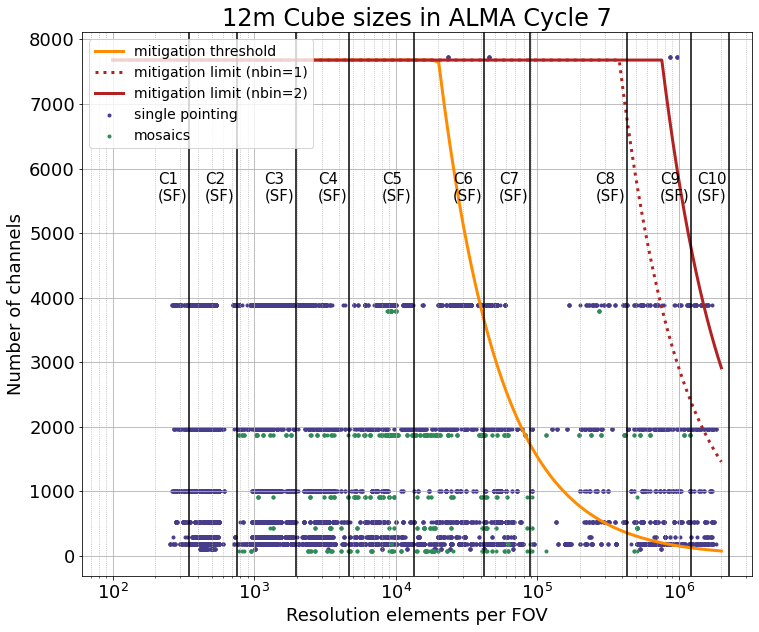

In [9]:
large_cubes.make_beamsperfov_vs_nchan(result2019, 'plots/cycle7_12m_cube_size.png', array='12m', addconfigs=True, cycle='7')

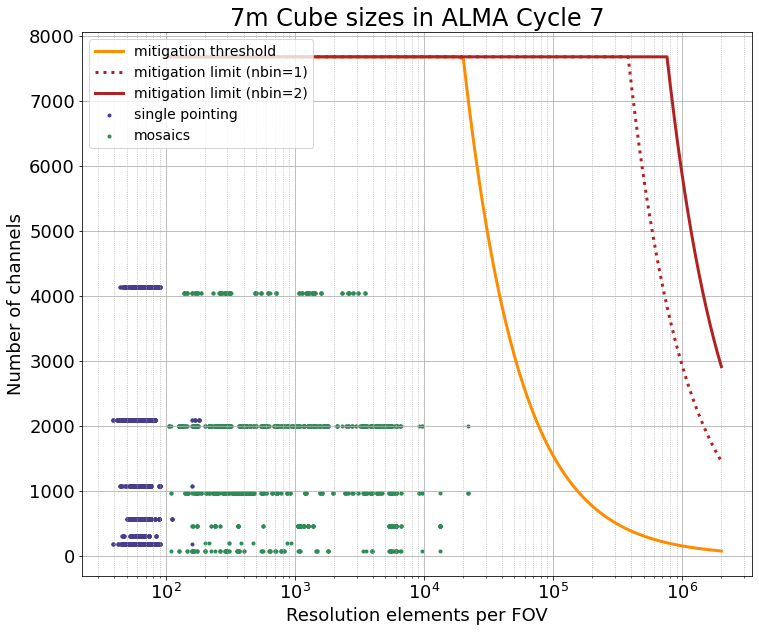

In [10]:
large_cubes.make_beamsperfov_vs_nchan(result2019, 'plots/cycle7_7m_cube_size.png', array='7m', addconfigs=False, cycle='7')

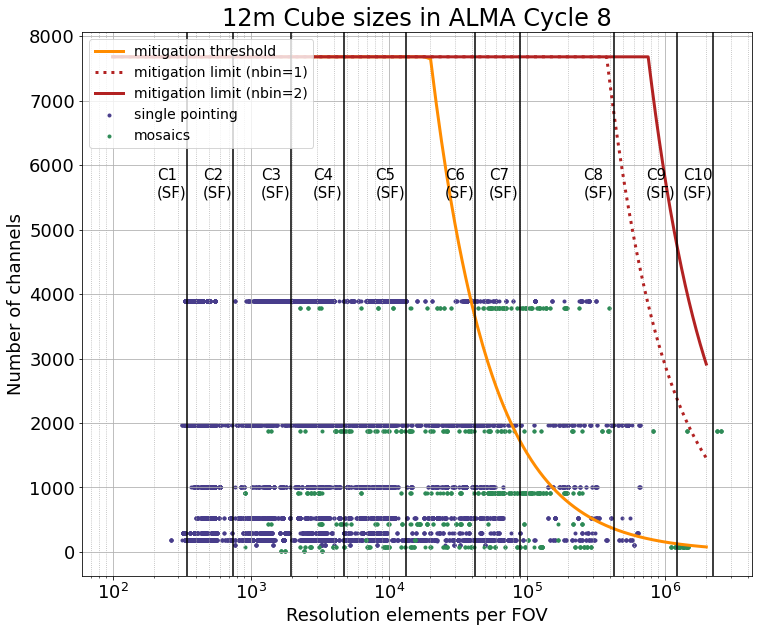

In [11]:
large_cubes.make_beamsperfov_vs_nchan(result2021, 'plots/cycle8_12m_cube_size.png', array='12m', addconfigs=True, cycle='8')

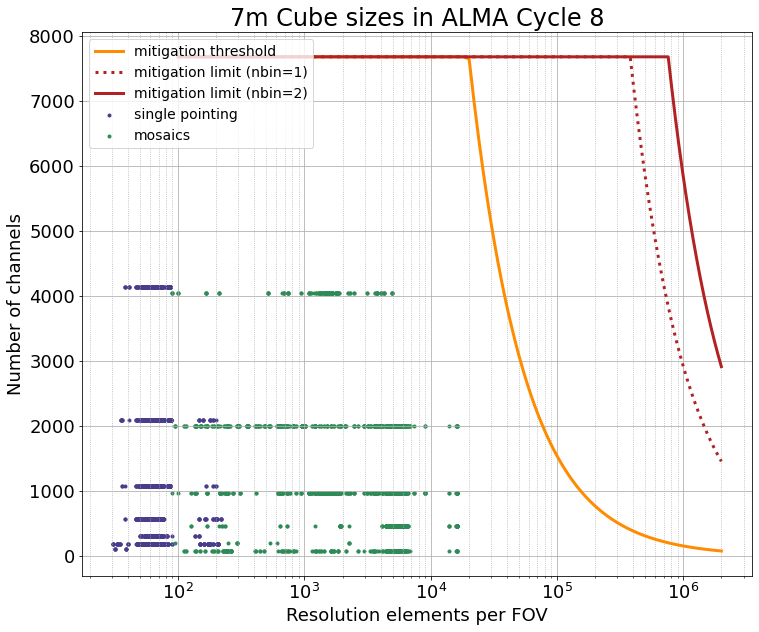

In [12]:
large_cubes.make_beamsperfov_vs_nchan(result2021, 'plots/cycle8_7m_cube_size.png', array='7m', addconfigs=False, cycle='8')

## Plot showing SCG sample

In [13]:
mous_list = [{'member_ous_uid':'uid://A001/X1465/X20d0','marker':'x'}, #original tests
             {'member_ous_uid': 'uid://A001/X1465/X2009', 'marker':'x'}, #original tests
             {'member_ous_uid': 'uid://A001/X1465/X3477', 'marker': 'x'}, #original tests
             {'member_ous_uid': 'uid://A001/X1465/X20c1', 'marker': '^'}, #mosaics
             {'member_ous_uid': 'uid://A001/X1465/X3465', 'marker': '^'}, #mosaics
             {'member_ous_uid': 'uid://A001/X1471/X317', 'marker': '^'}, # mosaics
             {'member_ous_uid': 'uid://A001/X1465/Xd63', 'marker': 's'}, # single field
             {'member_ous_uid': 'uid://A001/X1465/Xc05', 'marker': 's'}, # single field
             {'member_ous_uid': 'uid://A001/X1465/X1ac2', 'marker' : 's'}, # single field
             {'member_ous_uid': 'uid://A001/X1465/X2a84', 'marker': 'p','markersize':75}] # single pol             

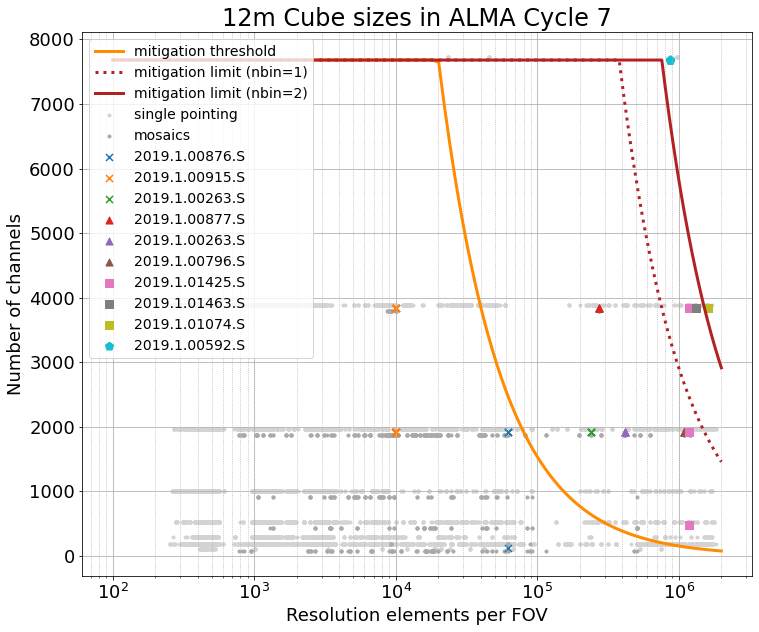

In [14]:
large_cubes.make_beamsperfov_vs_nchan(result2019,'plots/cycle7_12m_cube_size_scg.png',array='12m',addconfigs=False,cycle='7',mous_list=mous_list)